In [1]:
import sys
sys.path.append("C:/Users/Tom/PycharmProjects/python-mechanics")

# Bending

Determine the maximum bending stress in the beam shown in the figure below (this figure is taken from example 6.12 in **Mechanics of Materials 10th Edition in SI units by R.C. Hibbeler**).

![example_01](./images/example_01a.png) 

In [2]:
from mechanics import Quantity
from mechanics.statics import (
    DistributedLoad1D,
    Hinge2D,
    Roller2D,
    Beam2D
)
from mechanics.charts import LineChart
from mechanics.section import Section, WideFlange, Dimensions

Q_ = Quantity

> To get more explanation about how to use a certain function, a certain class or one of its methods, etc. in this library, you can use the notebook's contextual help (which can be opened from the context menu that appears when clicking the right mouse button), or by using Python's built-in `help` function, or by using IPython's question mark. E.g. to get more information about how to define a linear (1D) distributed loading acting on a beam with the `DistributedLoad1D` class, you could add a new code cell to this notebook and type: `DistributedLoad1D?`.

## External Loading - Reaction Forces

Define the distributed loading acting on the beam:

In [3]:
q = DistributedLoad1D(points=[
    (Q_(0, 'm'), Q_(-5, 'kN / m')),
    (Q_(6, 'm'), Q_(-5, 'kN / m'))
])

> To define the position of a force, beam support, etc., we need a reference frame. For this a right-handed cartesian coordinate system is used. The origin of the coordinate system is located at the left end of the beam. The horizontal x-axis is the longitudinal axis of the beam and the positive sense of the x-axis is pointing to the right end of the beam. In a right-handed cartesian coordinate system, the y-axis, also going through the origin, runs vertically with its positive sense pointing upward. The orientation of the z-axis can be determined with the right-hand rule: when the fingers of the right hand are curled from the positive x- to the positive y-axis side, the stretched thumb will point in the positive sense of the z-axis. 

Define the beam supports:

In [4]:
hinge_A = Hinge2D(name='R_A', position=Q_(0, 'm'))
roller_B = Roller2D(name='R_B', position=Q_(6, 'm'))

Define the beam and add the external loads and the supports to the beam:

In [5]:
beam = Beam2D(length=Q_(6, 'm'), loads=[q], supports=[hinge_A, roller_B])

Get the reaction forces exerted by the supports on the beam:

In [6]:
reactions = beam.get_reactions()
for support_name, reaction in reactions.items():
    print(f"{support_name}: {reaction}")

R_A: (<x: -0.000 N; y: 15000.000 N; z: 0.000 N>, None)
R_B: (<x: 0.000 N; y: 15000.000 N; z: 0.000 N>, None)


> The reaction force of support A at the left end of the beam only has a y-component, so it is a vertical force. The y-component has a positive sign, which means the vertical force is pointing upward in our reference frame. The same applies to the reaction force of support B at the right end of the beam.   

## Moment Diagram

Once the external loadings, including the reactions exerted by supports, acting on the beam are known, we need to find the cross-section of the beam where the internal bending moment has a maximum. 

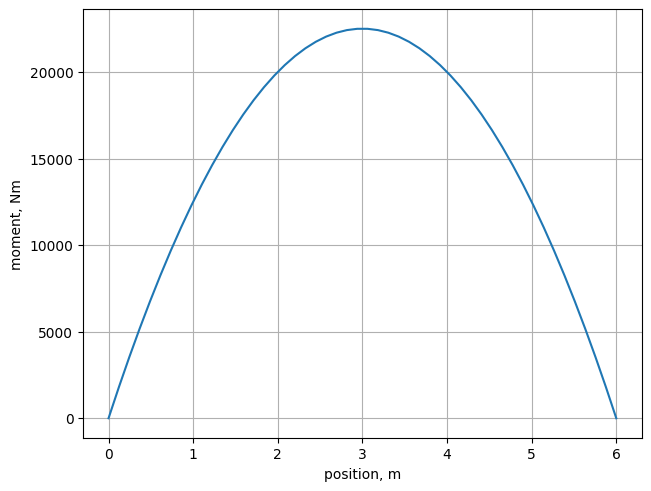

In [7]:
x_arr, *_, M_arr = beam.diagrams_data()
diagram = LineChart()
diagram.add_xy_data(
    label='M-diagram',
    x1_values=x_arr.m,
    y1_values=M_arr.m
)
diagram.x1.add_title('position, m')
diagram.y1.add_title('moment, Nm')
diagram.show()

## Maximum Bending Moment

From the M-diagram, it follows that the maximum bending moment is acting in the middle of the beam. By calling the `cut` method on the `Beam2D` object, we get the internal loadings at the specified cross-section.  

In [8]:
il = beam.cut(x=Q_(3, 'm'))
print(il)
M = il['M_z']
print(f"{M.to('kN * m'):~P.1f}")

{'F_x': <Quantity(1e-12, 'newton')>, 'F_y': <Quantity(0.0, 'newton')>, 'M_x': <Quantity(0.0, 'newton * meter')>, 'M_z': <Quantity(22500.0, 'newton * meter')>}
22.5 kN·m


> The vector of a bending moment in the xy-plane of the coordinate system is directed along the z-axis. A positive moment indicates a counter-clockwise rotation in accordance with the right-hand rule. 

## Maximum Bending Stress

To determine the bending stress in the cross-section, we still need to specify the geometry (shape) and dimensions of the cross-section. A drawing of the H-beam cross-section is shown below. 

![wide flanged beam](./images/example_01b.png)

Specify the dimensions of the H-beam cross-section:

In [9]:
dim = Dimensions(
    height=Q_(340, 'mm'),
    width=Q_(250, 'mm'),
    web_thickness=Q_(20, 'mm'),
    flange_thickness=Q_(20, 'mm')
)

Define the cross-section:<br> To define the cross-section, we need to specify the shape (being a subclass of abstract base class `Shape`) and its dimensions. The subclass that defines the cross-section shape of an H-beam is the `WideFlange` class.

In [10]:
section = Section(WideFlange, dim)

Set the internal bending moment at the cross-section and get the maximum bending stress in the section:

In [11]:
section.set_bending_moment(M)
print(f"{section.sigma_M.to('MPa'):~P.1f}")

12.7 MPa


A positive bending moment will pull on the bottom part of the section (i.e. below the neutral axis) and will push on its upper part.